<h1><center>IMPACT OF COVID-19 AND LOCKDOWN ON OUR PERCEPTION/LIFE EXPECTANCY:WORLD HAPPINESS REPORT</center></h1>

__Author__: David Montaño Castro.

__University__: Universidad Nacional Autónoma de México.

# Introduction
Covid 19 has shown us how sensitive our emotional stability may be. Regardless our nationality, our occupation or even to which socioeconomical class we belong to, catastrophic events such as a pandemic can influenced our behaviour and the way we perceive our feelings, not to mention our life expectancy. 

The following research was born due to a scholar final project. Through this paper, I am going to tackle mainly 4 points:

1. __Can we predict life expectancy taking into account our perceptions?__

2. __Has Covid 19 LockDown increased sentiments such as worry, sadness and anger?__

3. __Depending on the place we live, Has Covid 19 lockdown encreased/decreased our perception of satisfaction?__

4. __Depending on the place we live, Has Covid 19 lockdown made us feel less free to make life choices?__

In [601]:
import pandas as pd
import numpy as np
import itertools

"""Plots"""

import matplotlib.pyplot as plt
import seaborn as sns

"""Evaluation"""

from sklearn.metrics import mean_squared_error

"""Linear Regression"""

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white as white

"""Tree Regression"""

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

"""ANOVA one way & ANOVA two ways without replication"""

from statsmodels.formula.api import ols
from scipy.stats import levene

"""Settings"""

pd.set_option('display.max_columns', 500)
plt.rcParams["figure.figsize"] = (20,15) 
plt.style.use('seaborn-poster') 

### Import data

Data was imported from [Kaggle](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021).

For a better understanding visit [Gallup World Poll](https://www.gallup.com/analytics/349487/gallup-global-happiness-center.aspx). 

Varaible description can be read on [this PDF](https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf).

Simultaneously, WHP website provides their [references](https://happiness-report.s3.amazonaws.com/2021/Appendix2WHR2021C2.pdf) from where they selectioned their sources of information used to deploy the data that I am going to work with. 

Frequently asked Questions can be found [here](https://worldhappiness.report/faq/).

World Happiness Report is a benchmark for societal health largely used by many companies and goverments all around the world. 2021 edition was mainly focus on Coronavirus impact during 2021 according to WHR's metrics: "In particular, we try to explain why some countries have done so much better than others."

1. __df2021__: Dataset containing worldwide metrics of 2021.
2. __df__: Dataset containing metrics from  a period of time depending on the country.

In [6]:
df2021 = pd.read_csv("world-happiness-report-2021.csv")
df = pd.read_csv("world-happiness-report.csv")

### Dropping columns 

As per __df2021__, there are certain variables which I consider will not be useful for my analysis. A major description of these variables can be found on the PDF refered before. Having taken into accound this, I will only selected varibles from __df__ to homogenalize both datasets. In other words, I will drop:

- _Explained by:_  columns: Since GWP doesn't imput missing data, they have created these columns. "We do not make use of any imputed missing values in our rankings of happiness and its supporting factors. The only place where we make use of imputation is when we try to decompose a country’s average ladder score into components explained by six hypothesized underlying determinants (GDP per person, healthy life expectancy, social support, perceived freedom to make life choice, generosity and perception of corruption)".

- _Standard error of ladder score_, _upperwhisker_ and _lowerwhisker_: Used to make confident intervals for descriptive analysis. For this analysis may not be useful or at least it is not the kind of analysis requiered.

- _Ladder score in Dystopia_, _Dystopia + residual_: Kaggle reports: "Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors". Dystopia won't be used for the present analysis. 

In [25]:
df2021 = df2021[df2021.loc[:,:"Perceptions of corruption"].columns.difference(["Standard error of ladder score","upperwhisker","lowerwhisker"])]

In [17]:
df.head(3)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.8,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.2,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.6,0.600,0.121,0.707,0.618,0.275


In [26]:
df2021.head(3)

,Country name,Freedom to make life choices,Generosity,Healthy life expectancy,Ladder score,Logged GDP per capita,Perceptions of corruption,Regional indicator,Social support
0,Finland,0.949,-0.098,72.0,7.842,10.775,0.186,Western Europe,0.954
1,Denmark,0.946,0.030,72.7,7.620,10.933,0.179,Western Europe,0.954
2,Switzerland,0.919,0.025,74.4,7.571,11.117,0.292,Western Europe,0.942


### Quick description df2021
Nothing seems to be wrong.

In [165]:
df2021.describe().T

,count,mean,std,min,25%,50%,75%,max
Freedom to make life choices,149.0,0.791597,0.113332,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,0.150657,-0.288,-0.126,-0.036,0.079,0.542
Healthy life expectancy,149.0,64.992799,6.762043,48.478,59.802,66.603,69.600,76.953
Ladder score,149.0,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842
Logged GDP per capita,149.0,9.432208,1.158601,6.635,8.541,9.569,10.421,11.647
Perceptions of corruption,149.0,0.727450,0.179226,0.082,0.667,0.781,0.845,0.939
Social support,149.0,0.814745,0.114889,0.463,0.750,0.832,0.905,0.983


### Missing data

df2021 has no missing values.

In [28]:
df2021.isna().sum().where(lambda x: x>0).dropna()

Series([], dtype: float64)

Most of missing data in __df__ is located on Perceptions of corruption column just as PDF says. Regarless this lack of data I won't drop any tuple until I get to work on it. 

In [29]:
df.isna().sum().where(lambda x: x>0).dropna()

Log GDP per capita                   36.0
Social support                       13.0
Healthy life expectancy at birth     55.0
Freedom to make life choices         32.0
Generosity                           89.0
Perceptions of corruption           110.0
Positive affect                      22.0
Negative affect                      16.0
dtype: float64

### Variable definitions

- __Ladder Score__ or Happiness Score: “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?”.

- __Log GDP per capita__: It is the total monetary or market value of all the finished goods and services produced within a country’s borders in a specific time period.

- __Healthy life expectancy__: Based on the data extracted from the World Health Organization’s (WHO)

- __Social Suport__: “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”.

- __Freedom to make life choices__: “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

- __Generosity__: “Have you donated money to a charity in the past month?” on GDP per capita.

- __Corruption Perception__: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”

- __Positive Affect__: “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Happiness?”, “Did you smile or laugh a lot yesterday?”, and “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Enjoyment?”

- __Negative affect__: “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Worry?”, “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Sadness?”, and “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Anger?”

- __Year__: In addition, we count with longitudinal data from countries selected. 

# Descriptive Analysis (2021)

## Ladder Score

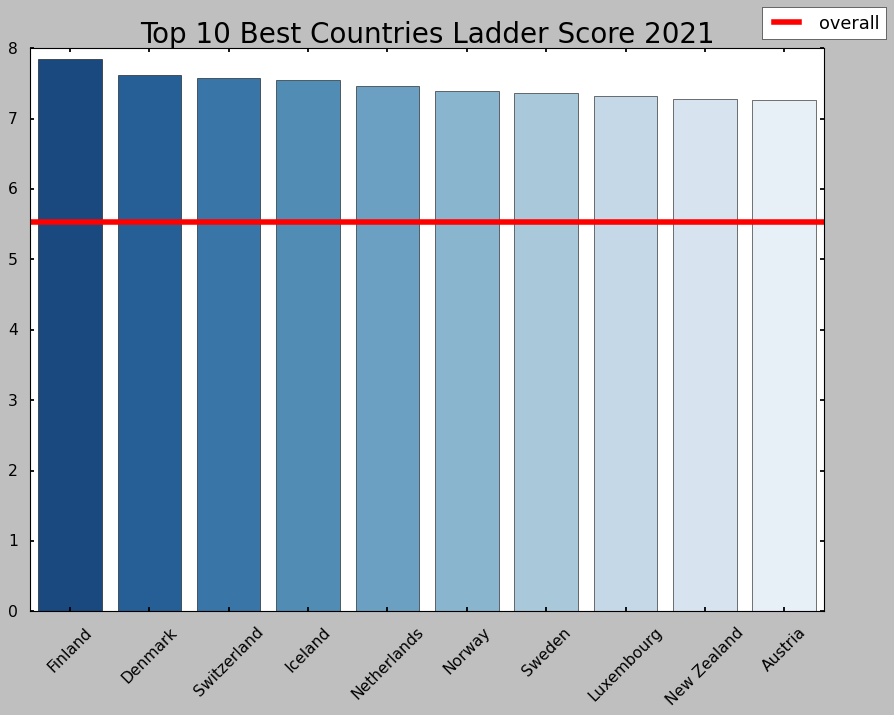

In [159]:
sns.barplot(df2021["Country name"][:10].values,df2021["Ladder score"][:10].values, palette = "Blues_r")
plt.axhline(y = df2021["Ladder score"].mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Top 10 Best Countries Ladder Score 2021", size = 25)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

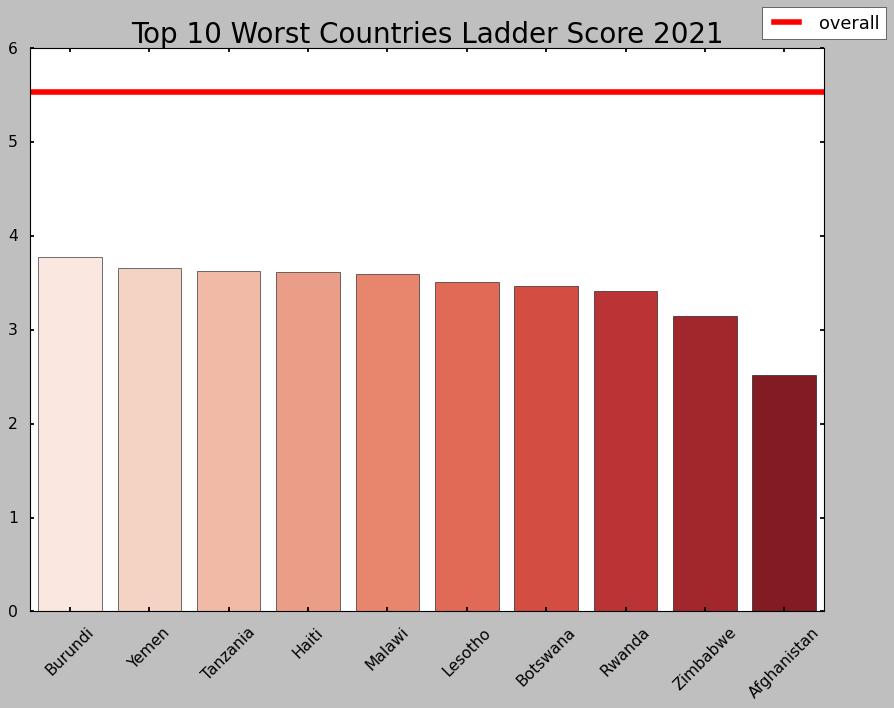

In [135]:
sns.barplot(df2021["Country name"][-10:].values,df2021["Ladder score"][-10:].values, palette = "Reds")
plt.axhline(y = df2021["Ladder score"].mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Top 10 Worst Countries Ladder Score 2021", size = 25)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

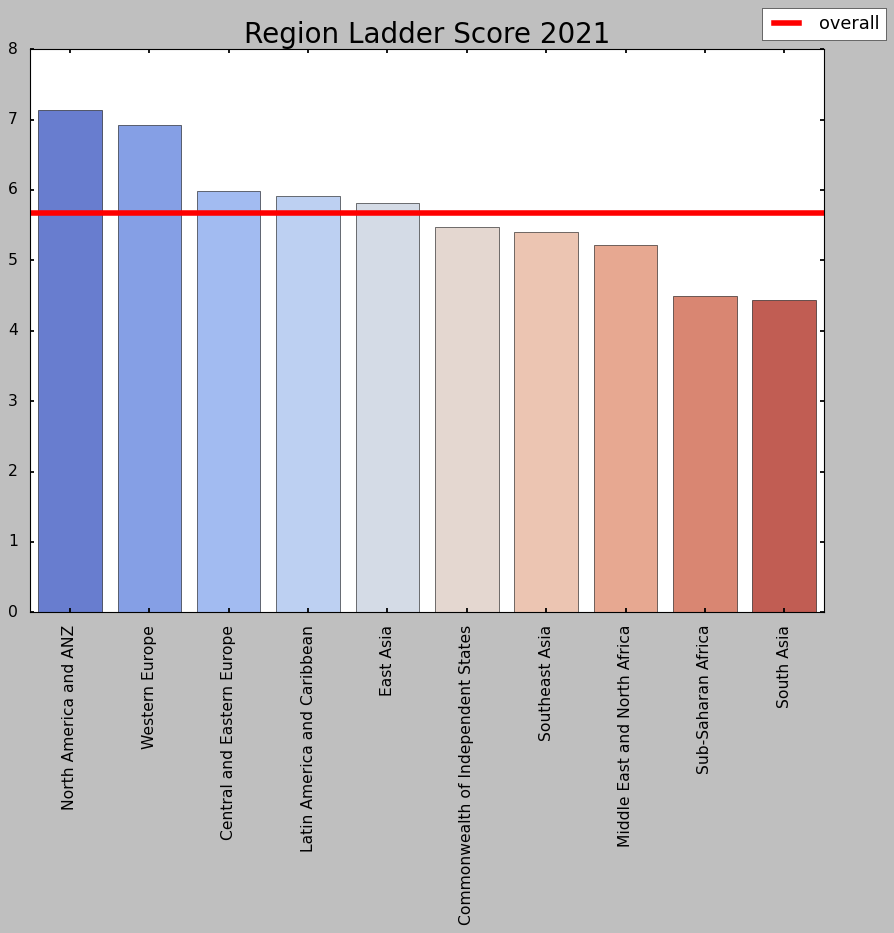

In [99]:
regional_ladder = df2021.groupby("Regional indicator")["Ladder score"].mean().sort_values(ascending = False)

sns.barplot(regional_ladder.index,regional_ladder.values, palette = "coolwarm")
plt.axhline(y = regional_ladder.mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Region Ladder Score 2021", size = 25)
plt.xticks(fontsize=14, rotation = "vertical")
plt.yticks(fontsize=14)
plt.xlabel("") 

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

## Generosity

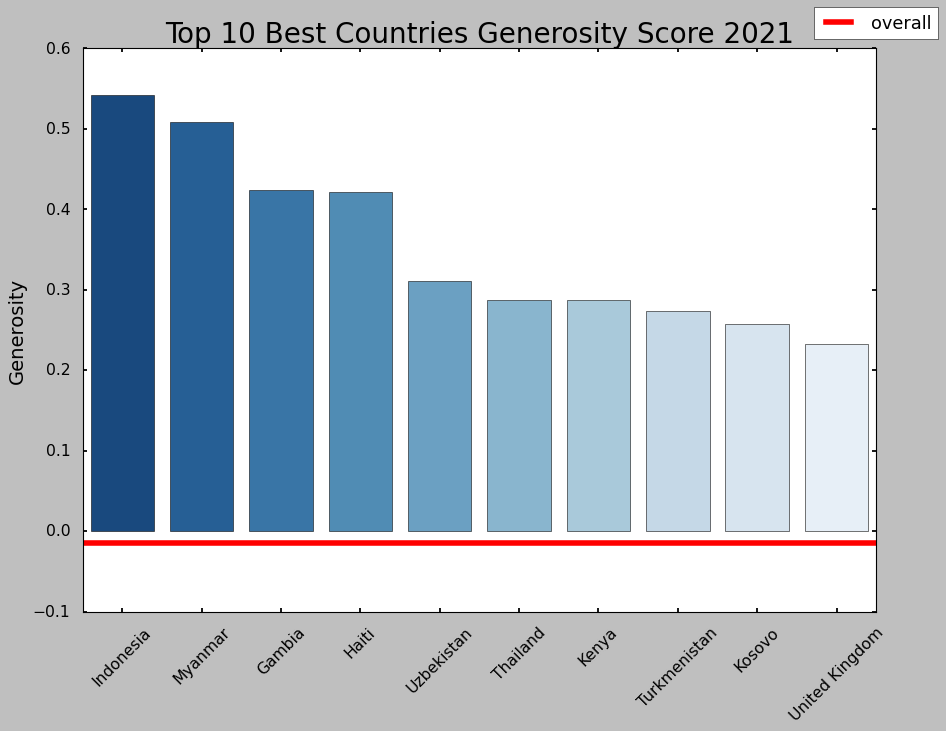

In [158]:
sns.barplot(df2021.sort_values(["Generosity"], ascending = False)["Country name"][:10].values,df2021.sort_values(["Generosity"], ascending = False)["Generosity"][:10], palette = "Blues_r")
plt.axhline(y = df2021["Generosity"].mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Top 10 Best Countries Generosity Score 2021", size = 25)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

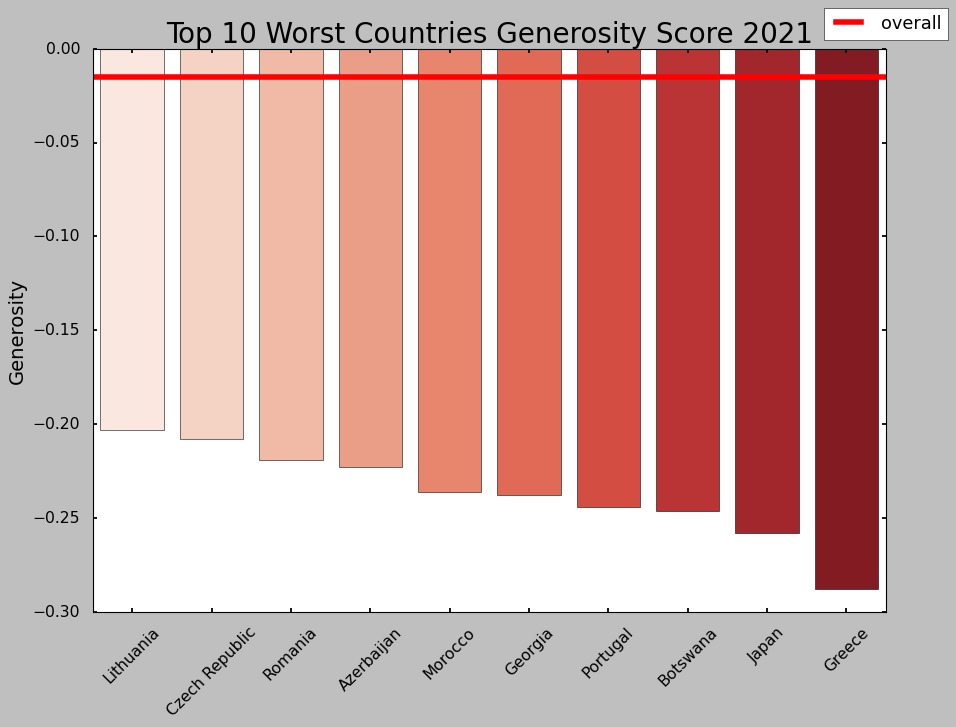

In [123]:
sns.barplot(df2021.sort_values(["Generosity"], ascending = False)["Country name"][-10:].values,df2021.sort_values(["Generosity"], ascending = False)["Generosity"][-10:], palette = "Reds")
plt.axhline(y = df2021["Generosity"].mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Top 10 Worst Countries Generosity Score 2021", size = 25)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

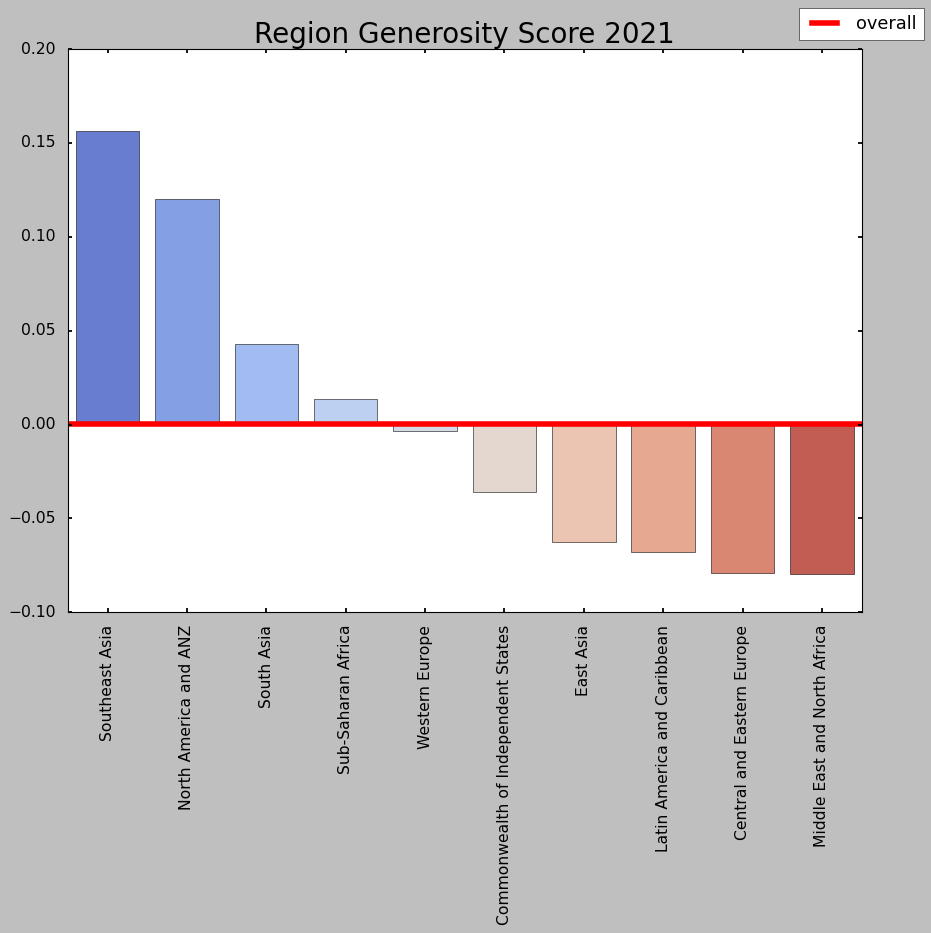

In [126]:
regional_generosity = df2021.groupby("Regional indicator")["Generosity"].mean().sort_values(ascending = False)

sns.barplot(regional_generosity.index,regional_generosity.values, palette = "coolwarm")
plt.axhline(y = regional_generosity.mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Region Generosity Score 2021", size = 25)
plt.xticks(fontsize=14, rotation = "vertical")
plt.yticks(fontsize=14)
plt.xlabel("") 

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

## Social Support

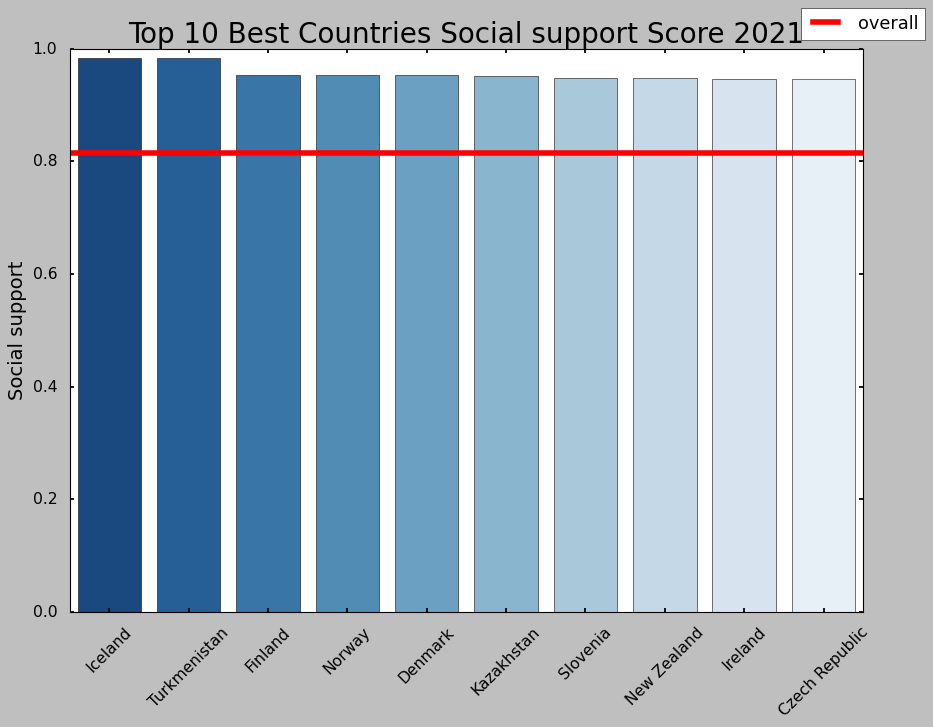

In [160]:
sns.barplot(df2021.sort_values(["Social support"], ascending = False)["Country name"][:10].values,df2021.sort_values(["Social support"], ascending = False)["Social support"][:10], palette = "Blues_r")
plt.axhline(y = df2021["Social support"].mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Top 10 Best Countries Social support Score 2021", size = 25)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

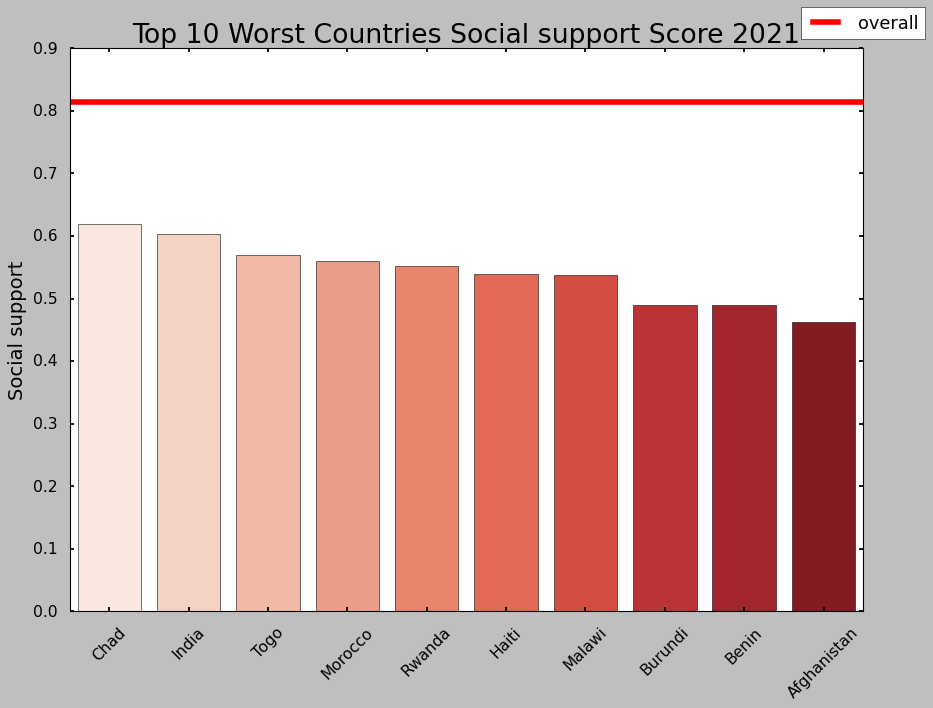

In [142]:
sns.barplot(df2021.sort_values(["Social support"], ascending = False)["Country name"][-10:].values,df2021.sort_values(["Social support"], ascending = False)["Social support"][-10:], palette = "Reds")
plt.axhline(y = df2021["Social support"].mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Top 10 Worst Countries Social support Score 2021", size = 24)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

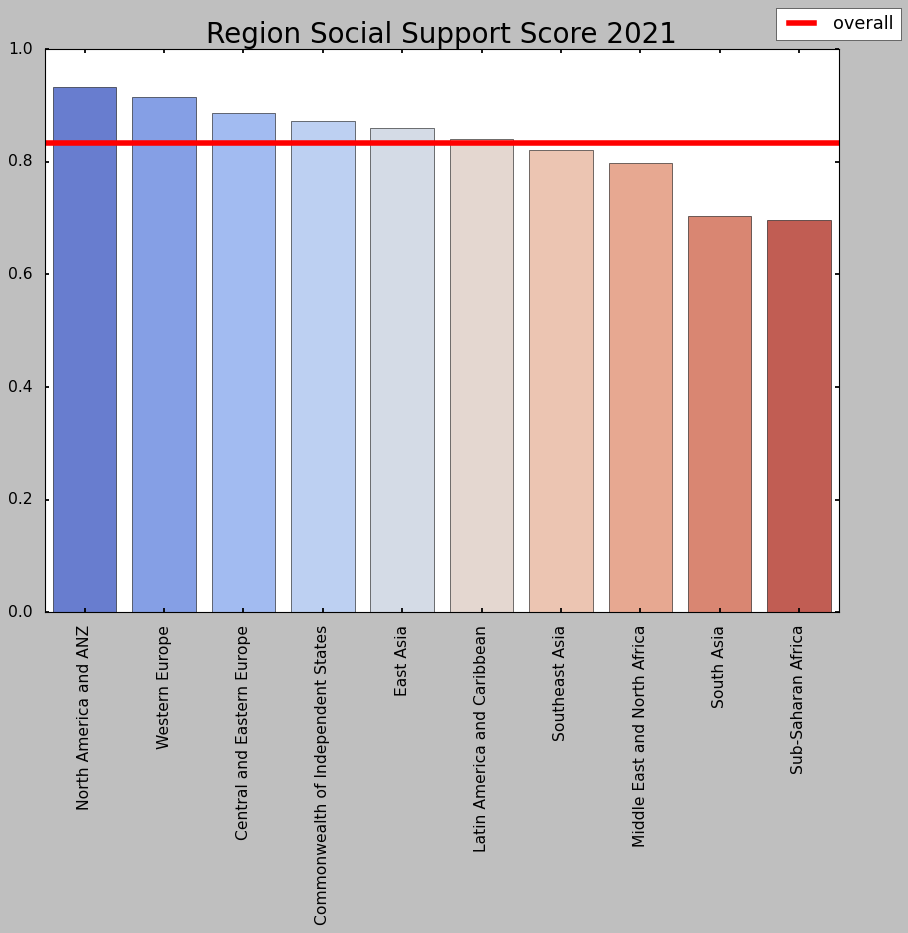

In [143]:
regional_support = df2021.groupby("Regional indicator")["Social support"].mean().sort_values(ascending = False)

sns.barplot(regional_support.index,regional_support.values, palette = "coolwarm")
plt.axhline(y = regional_support.mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Region Social Support Score 2021", size = 25)
plt.xticks(fontsize=14, rotation = "vertical")
plt.yticks(fontsize=14)
plt.xlabel("") 

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

## Perception of corruption

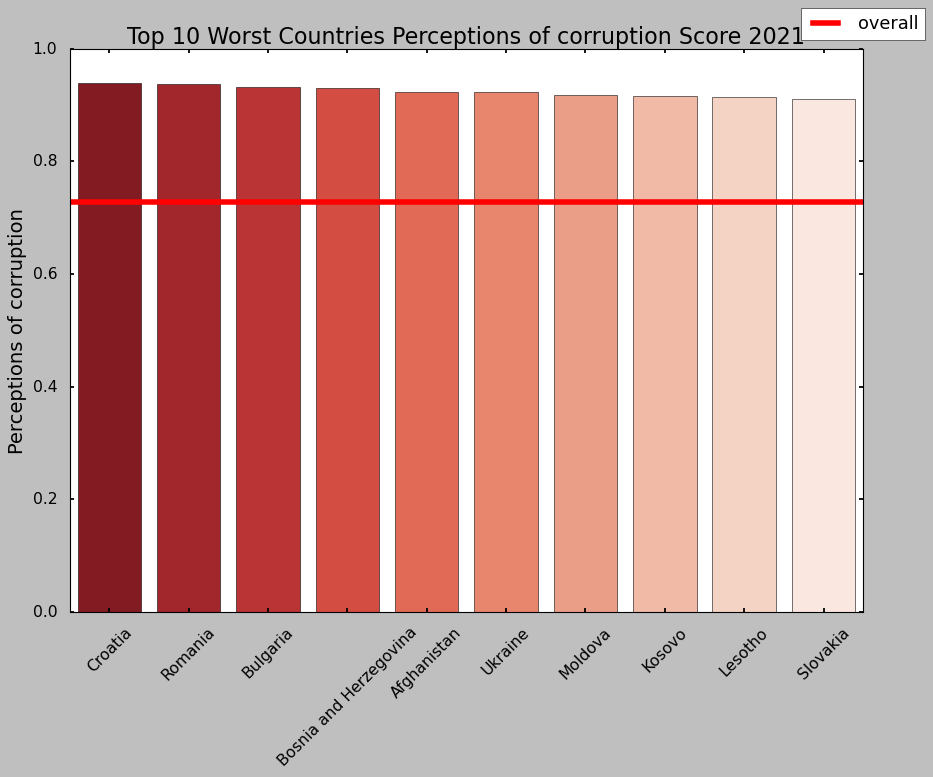

In [152]:
sns.barplot(df2021.sort_values(["Perceptions of corruption"], ascending = False)["Country name"][:10].values,df2021.sort_values(["Perceptions of corruption"], ascending = False)["Perceptions of corruption"][:10], palette = "Reds_r")
plt.axhline(y = df2021["Perceptions of corruption"].mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Top 10 Worst Countries Perceptions of corruption Score 2021", size = 20)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

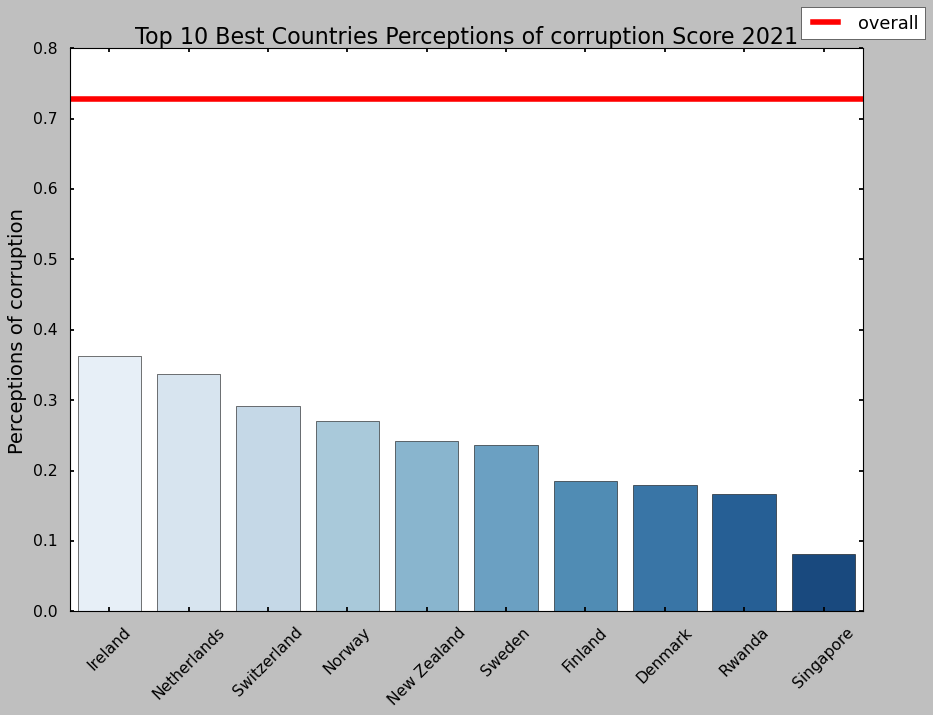

In [156]:
sns.barplot(df2021.sort_values(["Perceptions of corruption"], ascending = False)["Country name"][-10:].values,df2021.sort_values(["Perceptions of corruption"], ascending = False)["Perceptions of corruption"][-10:], palette = "Blues")
plt.axhline(y = df2021["Perceptions of corruption"].mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Top 10 Best Countries Perceptions of corruption Score 2021", size = 20)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

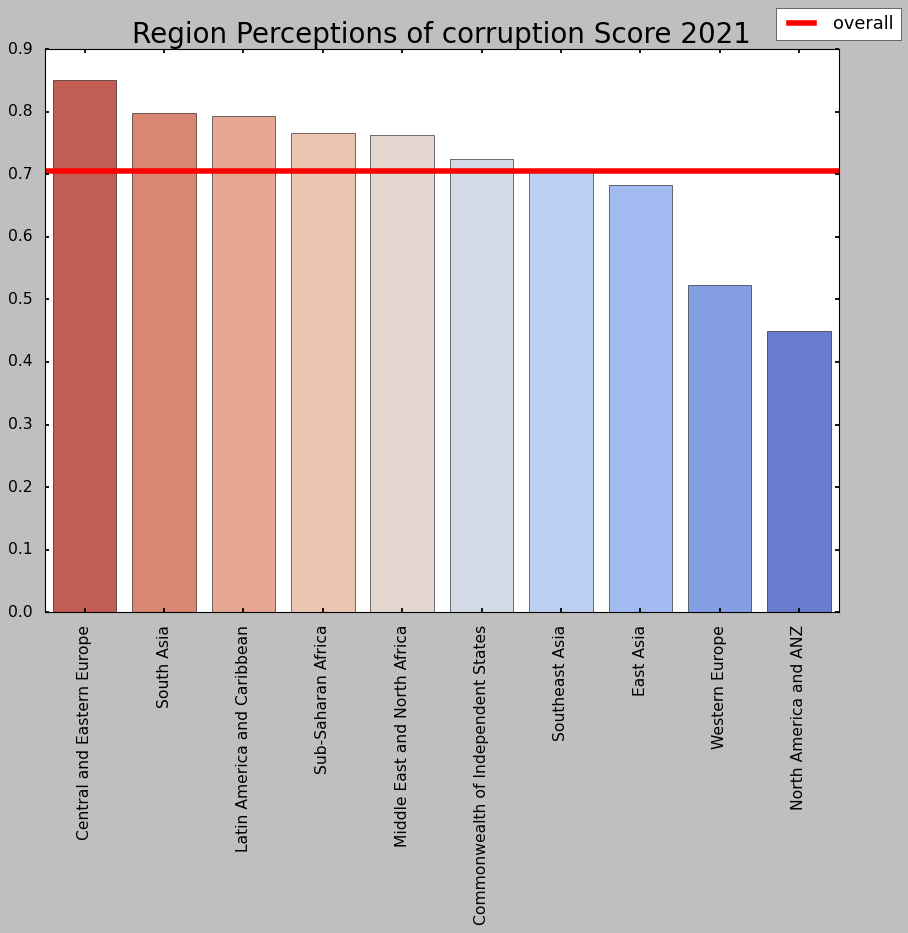

In [164]:
regional_corruption = df2021.groupby("Regional indicator")["Perceptions of corruption"].mean().sort_values(ascending = False)

sns.barplot(regional_corruption.index,regional_corruption.values, palette = "coolwarm_r")
plt.axhline(y = regional_corruption.mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Region Perceptions of corruption Score 2021", size = 25)
plt.xticks(fontsize=14, rotation = "vertical")
plt.yticks(fontsize=14)
plt.xlabel("") 

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

## Freedom to make life choices

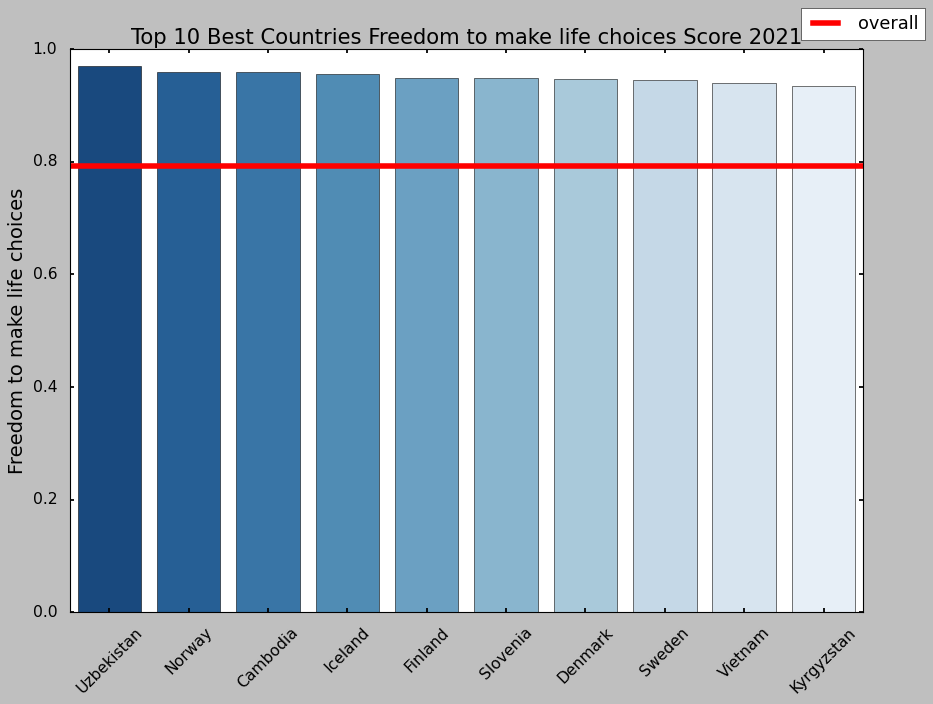

In [170]:
sns.barplot(df2021.sort_values(["Freedom to make life choices"], ascending = False)["Country name"][:10].values,df2021.sort_values(["Freedom to make life choices"], ascending = False)["Freedom to make life choices"][:10], palette = "Blues_r")
plt.axhline(y = df2021["Freedom to make life choices"].mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Top 10 Best Countries Freedom to make life choices Score 2021", size = 19)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

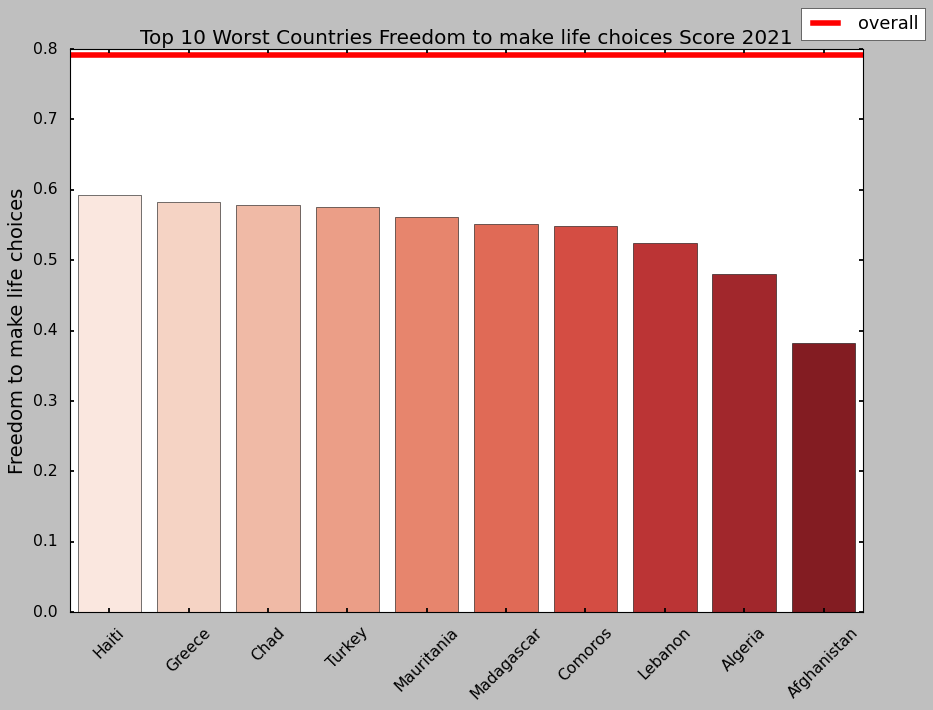

In [173]:
sns.barplot(df2021.sort_values(["Freedom to make life choices"], ascending = False)["Country name"][-10:].values,df2021.sort_values(["Freedom to make life choices"], ascending = False)["Freedom to make life choices"][-10:], palette = "Reds")
plt.axhline(y = df2021["Freedom to make life choices"].mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Top 10 Worst Countries Freedom to make life choices Score 2021", size = 18)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

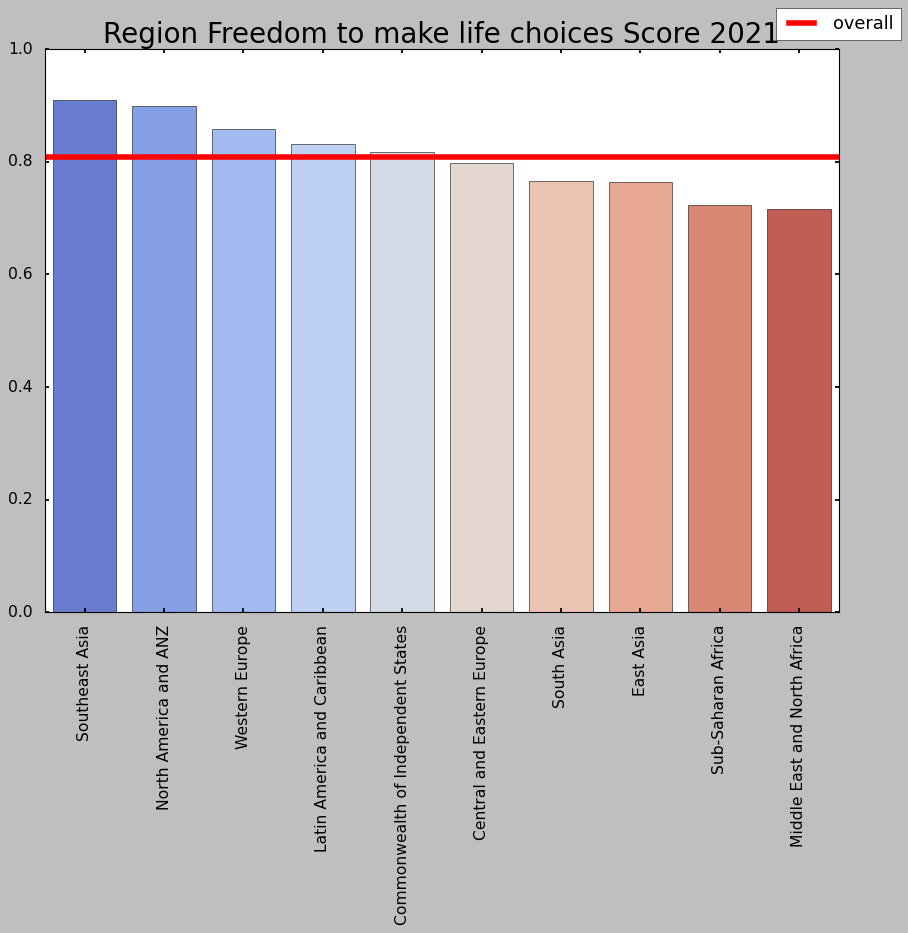

In [175]:
regional_freedom = df2021.groupby("Regional indicator")["Freedom to make life choices"].mean().sort_values(ascending = False)

sns.barplot(regional_freedom.index,regional_freedom.values, palette = "coolwarm")
plt.axhline(y = regional_freedom.mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Region Freedom to make life choices Score 2021", size = 25)
plt.xticks(fontsize=14, rotation = "vertical")
plt.yticks(fontsize=14)
plt.xlabel("") 

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

## Healthy life expectancy

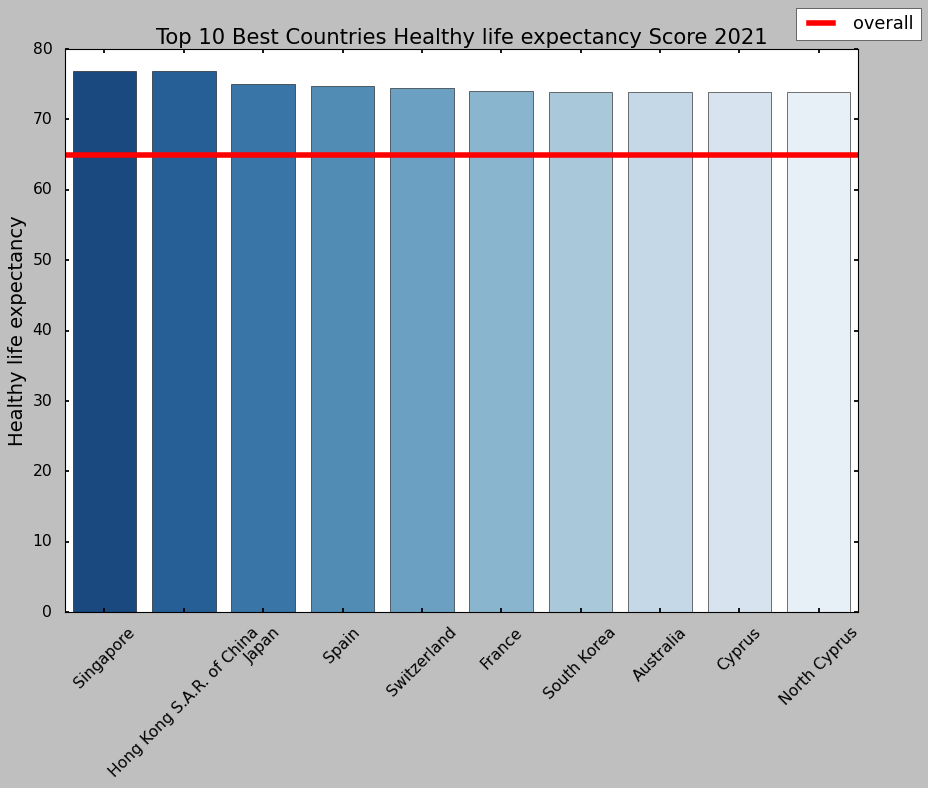

In [176]:
sns.barplot(df2021.sort_values(["Healthy life expectancy"], ascending = False)["Country name"][:10].values,df2021.sort_values(["Healthy life expectancy"], ascending = False)["Healthy life expectancy"][:10], palette = "Blues_r")
plt.axhline(y = df2021["Healthy life expectancy"].mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Top 10 Best Countries Healthy life expectancy Score 2021", size = 19)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

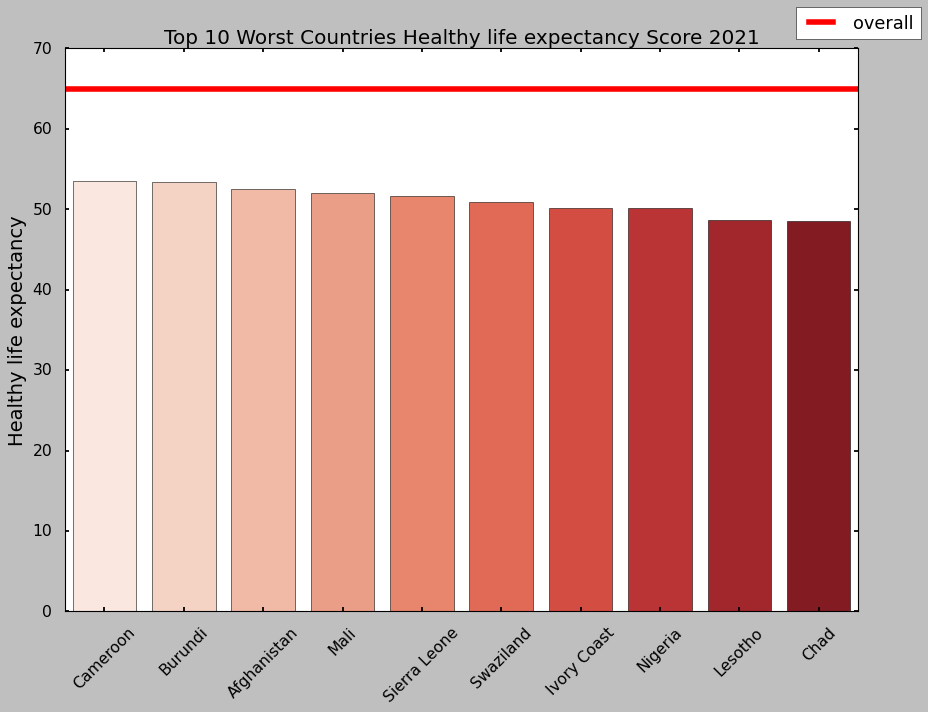

In [177]:
sns.barplot(df2021.sort_values(["Healthy life expectancy"], ascending = False)["Country name"][-10:].values,df2021.sort_values(["Healthy life expectancy"], ascending = False)["Healthy life expectancy"][-10:], palette = "Reds")
plt.axhline(y = df2021["Healthy life expectancy"].mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Top 10 Worst Countries Healthy life expectancy Score 2021", size = 18)
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

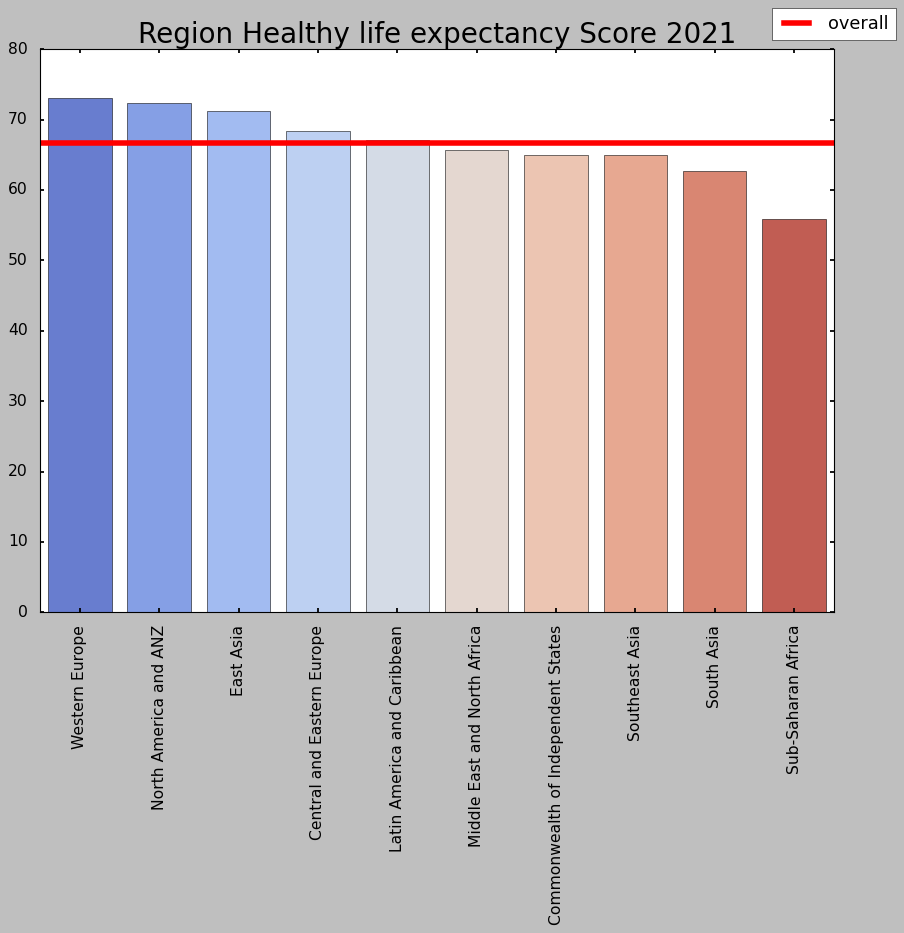

In [178]:
regional_life = df2021.groupby("Regional indicator")["Healthy life expectancy"].mean().sort_values(ascending = False)

sns.barplot(regional_life.index,regional_life.values, palette = "coolwarm")
plt.axhline(y = regional_life.mean(), color = "red", linewidth = 5,label = "overall")
plt.title("Region Healthy life expectancy Score 2021", size = 25)
plt.xticks(fontsize=14, rotation = "vertical")
plt.yticks(fontsize=14)
plt.xlabel("") 

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'lower center')
# plt.savefig("NIU_ALCALDIAS",bbox_inches = "tight", pad_inches = 0)

# Real Analysis

## Linear regression: Do latter variables help to predict life expectancy?

In [223]:
df2021regresion = df2021.copy().drop(columns = ["Country name","Regional indicator"])

### Correlation visualization

According to the following Heatmap, we notice _Ladder score_ outnumbers the variables having a strong linear correlation compared to Life expectancy. This may suggest another model to work with.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

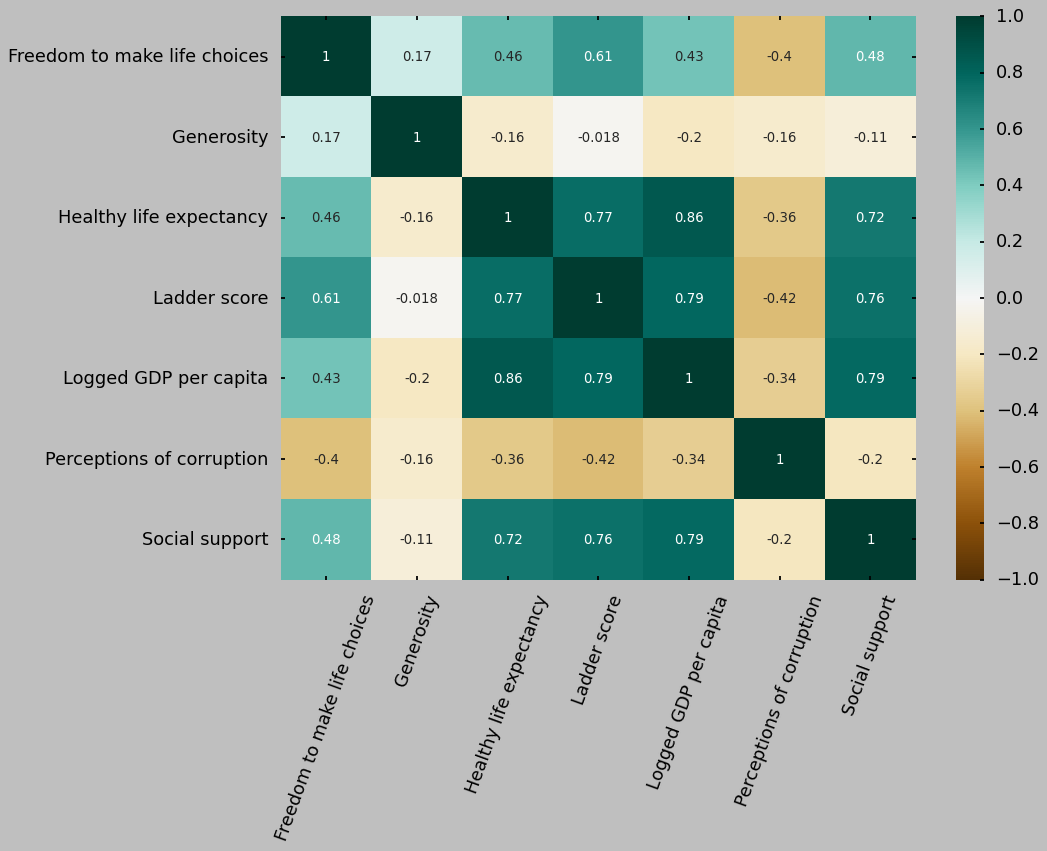

In [230]:
heatmap = sns.heatmap(df2021regresion.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.yticks(rotation = "horizontal")
plt.xticks(rotation = "70")

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

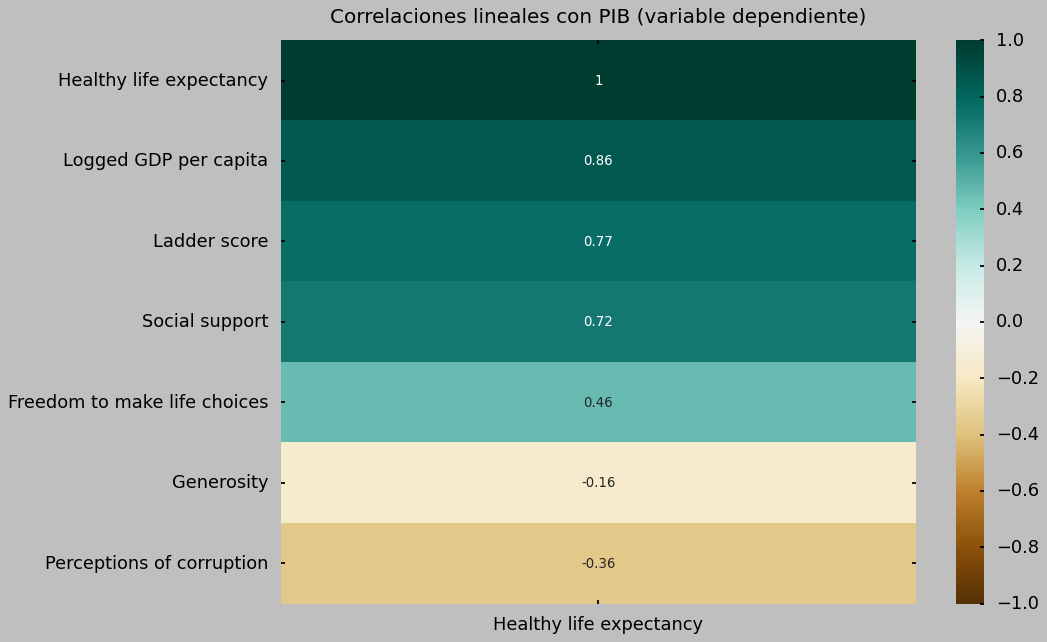

In [231]:
heatmap = sns.heatmap(df2021regresion.corr()[['Healthy life expectancy']].sort_values(by='Healthy life expectancy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlaciones lineales con PIB (variable dependiente)', fontdict={'fontsize':18}, pad=16)
plt.yticks(rotation = "horizontal")

### Linear Model

#### First model

First model (all variables) fits well since R-squared adjusted describe 75% of variance. As per variable selection, most of them are statistically 0 at a cofidence level of 95%. Those variables can be dropped; the rest might improve the results by creating a new model. Since JB test rejects Null hypothesis, we have no normality distribution of residuals. Aside from that everything seems to work.

In [390]:
X = df2021regresion.drop(columns = ["Healthy life expectancy"])
Y = df2021regresion["Healthy life expectancy"]

Xreg = sm.add_constant(X)
Yreg = Y


model1 = sm.OLS(Yreg, Xreg, prepend=True).fit()
display(model1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Healthy life expectancy   R-squared:                       0.765
Model:                                 OLS   Adj. R-squared:                  0.755
Method:                      Least Squares   F-statistic:                     76.88
Date:                     Mon, 27 Dec 2021   Prob (F-statistic):           3.85e-42
Time:                             10:15:39   Log-Likelihood:                -387.94
No. Observations:                      149   AIC:                             789.9
Df Residuals:                          142   BIC:                             810.9
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           21.0255      3.664      5.738      0.000      13.782      28.269
Freedom to make life choices     2.1646      3.227      0.671      0.503      -4.214       8.544
Generosity                      -1.8830      1.989     -0.947      0.345      -5.814       2.048
Ladder score                     1.1586      0.510      2.274      0.024       0.151       2.166
Logged GDP per capita            3.6440      0.464      7.845      0.000       2.726       4.562
Perceptions of corruption       -2.0055      1.815     -1.105      0.271      -5.594       1.583
Social support                   3.5622      4.316      0.825      0.411      -4.970      12.094
==============================================================================
Omnibus:                       16.339   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.686
Skew:                          -0.744   Prob(JB):                     8.76e-05
Kurtosis:                       3.891   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

la heterocedasticidad del modelo, lo cuál no incluye por defecto el resumen de statsmodels. Para este caso, incluiré el __test de White__. 

>>>>> Ho: No hay presencia de heterocedasticidad vs Ha: Hay presencia de heretocedasticidad

In [391]:
print("LM-test: ", white(model1.resid,Xreg)[1], 2*"\n", "F-test: ", white(model1.resid,Xreg)[3])

LM-test:  0.5708861596675643 

 F-test:  0.6018535499449675


#### Second model

Second model does improve after removing no significant variables; however, residuals still have non-normality distribution. 

In [336]:
X2 = df2021regresion.drop(columns = ["Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption","Social support"])
Y2 = df2021regresion["Healthy life expectancy"]

Xreg2 = sm.add_constant(X2)
Yreg2 = Y2


model2 = sm.OLS(Yreg2, Xreg2, prepend=True).fit()
display(model2.summary())
print("LM-test: ", white(model2.resid,Xreg2)[1], 2*"\n", "F-test: ", white(model2.resid,Xreg2)[3])

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Healthy life expectancy   R-squared:                       0.760
Model:                                 OLS   Adj. R-squared:                  0.757
Method:                      Least Squares   F-statistic:                     231.0
Date:                     Sun, 26 Dec 2021   Prob (F-statistic):           5.90e-46
Time:                             14:56:38   Log-Likelihood:                -389.42
No. Observations:                      149   AIC:                             784.8
Df Residuals:                          146   BIC:                             793.9
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    19.7303      2.321      8.502      0.000      15.144      24.317
Ladder score              1.4949      0.416      3.591      0.000       0.672       2.318
Logged GDP per capita     3.9218      0.386     10.164      0.000       3.159       4.684
==============================================================================
Omnibus:                       15.247   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.213
Skew:                          -0.708   Prob(JB):                     0.000183
Kurtosis:                       3.878   Cond. No.                         95.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Third model
Dropping _Ladder score_ lead to a worst model.

In [239]:
X3 = df2021regresion.drop(columns = ["Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption","Social support","Ladder score"])
Y3 = df2021regresion["Healthy life expectancy"]

Xreg3 = sm.add_constant(X3)
Yreg3 = Y3


model3 = sm.OLS(Yreg3, Xreg3, prepend=True).fit()
display(model3.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Healthy life expectancy   R-squared:                       0.739
Model:                                 OLS   Adj. R-squared:                  0.737
Method:                      Least Squares   F-statistic:                     415.5
Date:                     Sun, 26 Dec 2021   Prob (F-statistic):           1.11e-44
Time:                             14:15:36   Log-Likelihood:                -395.73
No. Observations:                      149   AIC:                             795.5
Df Residuals:                          147   BIC:                             801.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    17.6795      2.338      7.560      0.000      13.058      22.301
Logged GDP per capita     5.0161      0.246     20.384      0.000       4.530       5.502
==============================================================================
Omnibus:                       19.884   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.103
Skew:                          -0.841   Prob(JB):                     5.84e-06
Kurtosis:                       4.027   Cond. No.                         79.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Can second model be improved by removing influential points?
Let's try to solve the normality distribution issue using Cook's Distance.

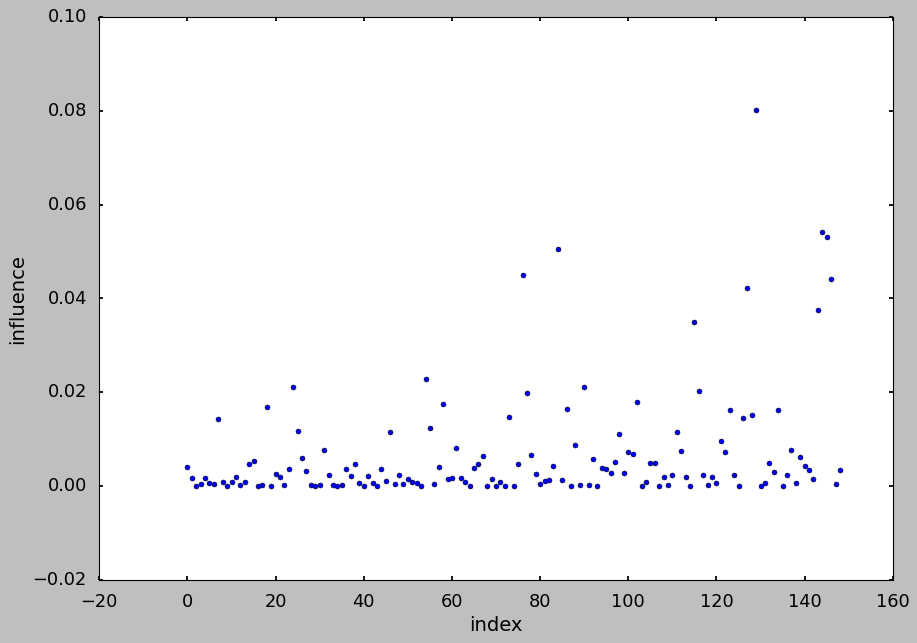

In [337]:
influence = model2.get_influence()
c,p = influence.cooks_distance
influence_df = Xreg2
influence_df['influence'] = c
influence_df["influence"].reset_index().plot(kind = "scatter", x = "index", y = "influence")

In [339]:
influence_df = influence_df[influence_df['influence']<=.035] #.035 
Xreg_noinf = sm.add_constant(df2021regresion.loc[influence_df.index,"Ladde score":"Logged GDP per capita"])
Yreg_noinf = df2021regresion.loc[influence_df.index,"Healthy life expectancy"]

In [340]:
model2_ = sm.OLS(Yreg_noinf,Xreg_noinf,prepend=True).fit()
display(model2_.summary())
print("LM-test: ", white(model2_.resid,Xreg_noinf)[1], 2*"\n", "F-test: ", white(model2_.resid,Xreg_noinf)[3])

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Healthy life expectancy   R-squared:                       0.803
Model:                                 OLS   Adj. R-squared:                  0.800
Method:                      Least Squares   F-statistic:                     279.3
Date:                     Sun, 26 Dec 2021   Prob (F-statistic):           4.57e-49
Time:                             14:56:54   Log-Likelihood:                -339.32
No. Observations:                      140   AIC:                             684.6
Df Residuals:                          137   BIC:                             693.5
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    21.4543      2.038     10.528      0.000      17.425      25.484
Ladder score              1.3265      0.374      3.543      0.001       0.586       2.067
Logged GDP per capita     3.8642      0.343     11.263      0.000       3.186       4.543
==============================================================================
Omnibus:                        3.011   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.826
Skew:                          -0.277   Prob(JB):                        0.243
Kurtosis:                       2.578   Cond. No.                         98.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LM-test:  0.04391185416784595 

 F-test:  0.042108542599595095


#### Predictions

I can make use of df data to test how well my model works. Data is to be longitudinal and might not present relevant differences, neither predictions. Hence I will only use data from 2020.

In [386]:
test = df[df["year"] == 2020][["Life Ladder","Log GDP per capita"]].dropna()
Xprediction= sm.add_constant(test)
Yprediction = model2_.predict(Xprediction)

In [387]:
predicciones_mostrar = df.iloc[Yprediction.index,[0,5]]
predicciones_mostrar["Predicciones"] = round(Yprediction,1)

In [388]:
predicciones_mostrar

,Country name,Healthy life expectancy at birth,Predicciones
24,Albania,69.3,65.3
51,Argentina,69.2,67.3
79,Australia,74.2,72.5
92,Austria,73.6,73.0
117,Bahrain,69.7,70.7
...,...,...,...
1835,United Kingdom,72.7,71.5
1850,United States,68.1,73.3
1865,Uruguay,69.2,68.2
1933,Zambia,56.3,59.2


In [389]:
round(mean_squared_error(predicciones_mostrar["Healthy life expectancy at birth"], predicciones_mostrar.Predicciones),3)

9.821

#### Conclusions

While trying to solve normality distribution I encountered a new problem: As I dropped influential points, heterocedasticity encreases. I gave up 9 countries during this process. I should go for another option: Tree regression. As a matter of the fact, MSE is 9.821. May a tree improve this result?

## Tree regression: Do later variables help to predict life expectancy?

#### Feature selection
From the past feature selection, I realized there exist some variables whose variance explanatory power is weak. To avert waste of time creating a well-known useless model, Python provides a tool to carry out feature selection easear which I wil use.

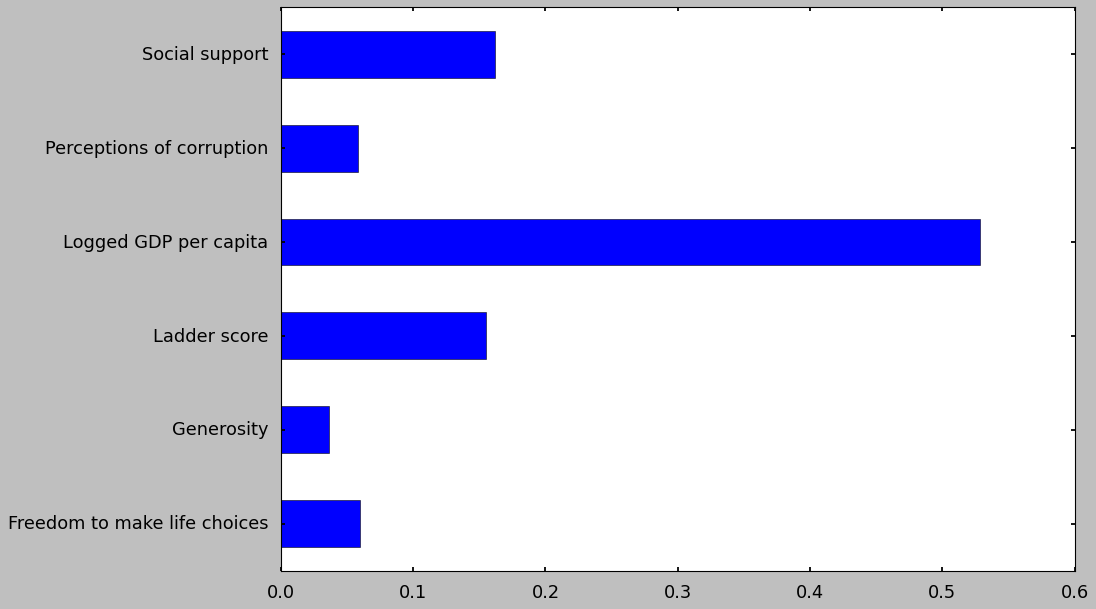

In [397]:
selectioner = ExtraTreesRegressor().fit(X,Y)
selectioner.feature_importances_

feat_importances = pd.Series(selectioner.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

From what I see, I will only use 3 of them

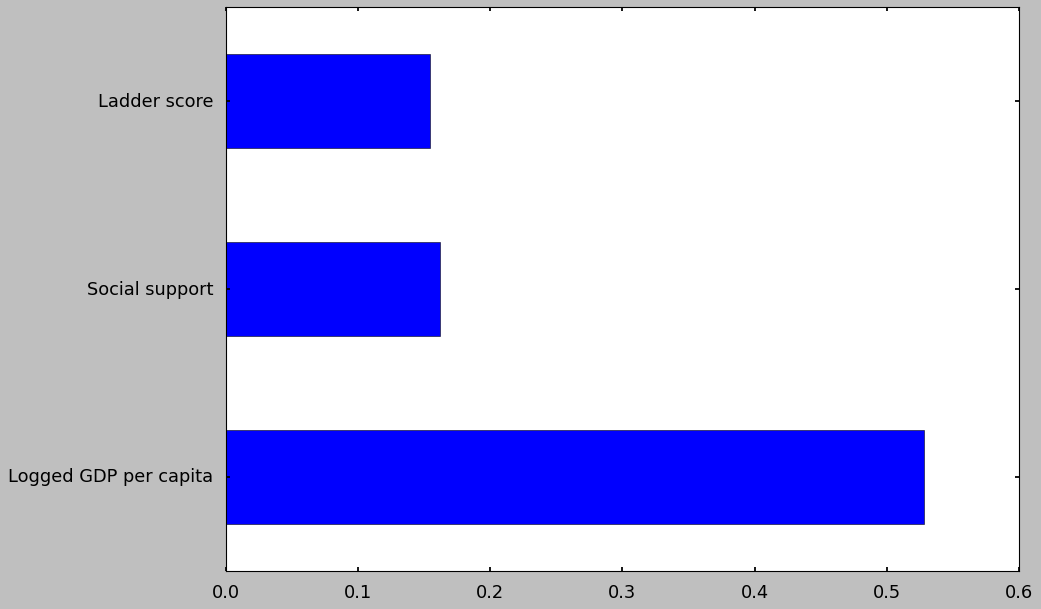

In [398]:
feat_importances = pd.Series(selectioner.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh') 

In [403]:
Xtree = X[["Ladder score","Social support","Logged GDP per capita"]]
Ytree = Y

#### Hyperparameter tunning
For the sake of training a good model, I have decided to do a parameter tunning prior to actually run and train a model.

In [411]:
reg_decision_model=DecisionTreeRegressor()

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,10],
           "min_samples_leaf":[5,6,7,8,9,10,15],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[2,5,6,8,10,11,12,13] }

tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)

In [415]:
# tuning_model.fit(Xtree,Ytree)

In [414]:
#tuning_model.best_params_

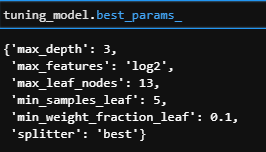

#### Fittng model

In [495]:
Tree = DecisionTreeRegressor(max_depth = 3, max_features = "log2",max_leaf_nodes = 15,min_samples_leaf = 5, min_weight_fraction_leaf = .1, splitter = "best", random_state =9).fit(Xtree,Ytree)

[Text(363.73333333333335, 492.80000000000007, 'Ladder score <= 5.364\nmse = 45.418\nsamples = 149\nvalue = 64.993'),
 Text(198.40000000000003, 352.0, 'Social support <= 0.797\nmse = 31.303\nsamples = 68\nvalue = 59.61'),
 Text(132.26666666666668, 211.20000000000005, 'Ladder score <= 4.375\nmse = 24.556\nsamples = 50\nvalue = 57.819'),
 Text(66.13333333333334, 70.39999999999998, 'mse = 15.203\nsamples = 20\nvalue = 56.012'),
 Text(198.40000000000003, 70.39999999999998, 'mse = 27.164\nsamples = 30\nvalue = 59.023'),
 Text(264.53333333333336, 211.20000000000005, 'mse = 16.367\nsamples = 18\nvalue = 64.587'),
 Text(529.0666666666667, 352.0, 'Logged GDP per capita <= 10.376\nmse = 12.527\nsamples = 81\nvalue = 69.512'),
 Text(396.80000000000007, 211.20000000000005, 'Social support <= 0.862\nmse = 5.581\nsamples = 42\nvalue = 67.029'),
 Text(330.6666666666667, 70.39999999999998, 'mse = 6.373\nsamples = 19\nvalue = 66.537'),
 Text(462.9333333333334, 70.39999999999998, 'mse = 4.561\nsamples = 

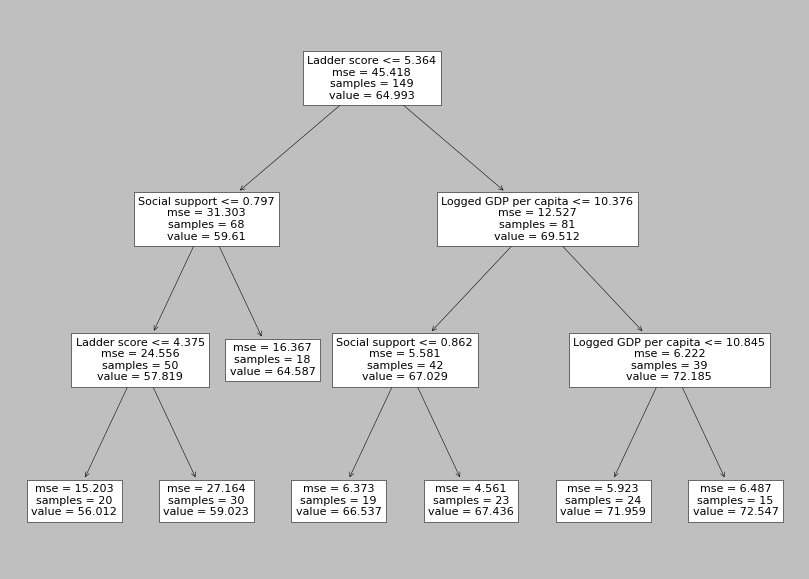

In [496]:
plot_tree(Tree,feature_names=Xtree.columns, fontsize=10)

#### Predictions

In [497]:
test_tree = df[df["year"] == 2020][["Life Ladder","Log GDP per capita","Social support"]].dropna().rename(columns = {"Life Ladder": "Ladder score","Log GDP per capita":"Logged GDP per capita"})
Yprediction_tree = Tree.predict(test_tree)

In [498]:
predicciones_mostrar_tree = df.loc[test_tree.index,["Country name","Healthy life expectancy at birth"]]
predicciones_mostrar_tree["Predicciones"] = Yprediction_tree

In [499]:
round(mean_squared_error(predicciones_mostrar_tree["Healthy life expectancy at birth"], predicciones_mostrar_tree.Predicciones),3)

25.545

#### Conclusions

Since Linear Regression has lower MSE compared to Tree regression, I would opt for Linear Regression. Plus its simplicity makes it the most suitable to interpret and to explain. 

## Two-way ANOVA without replication/ ANOVA two factors without replication (EXCEL): Has COVID 19 lockdown impacted our perception of happiness?

#### Sub-data

Select positive and negative affect from 2019 to 2020. Recall that I want to make this two periods of time a nominal variable, so they will represent "After" and "Before" rather than years per se. Something similar happens to be when one wants to do a Wilcoxon/Mann-Whitney test but in contrast one uses ordinal data.  

In [502]:
dfsin = df.copy()
dfsin = dfsin[(dfsin["year"] == 2019) | (dfsin["year"] == 2020)][["Country name","year","Positive affect","Negative affect"]]

In [510]:
dfsin

,Country name,year,Positive affect,Negative affect
11,Afghanistan,2019,0.351,0.502
23,Albania,2019,0.681,0.274
24,Albania,2020,0.679,0.265
32,Algeria,2019,0.585,0.215
50,Argentina,2019,0.826,0.319
...,...,...,...,...
1919,Yemen,2019,0.543,0.213
1932,Zambia,2019,0.743,0.394
1933,Zambia,2020,0.691,0.345
1947,Zimbabwe,2019,0.716,0.235


These countries don't have either 2019 or 2020 values. Hence I must remove them. 

In [516]:
drop_countries = dfsin["Country name"].value_counts().where(lambda x: x == 1).dropna().index
drop_countries

Index(['Mali', 'Niger', 'Jamaica', 'Afghanistan', 'Belarus', 'Turkmenistan',
       'Indonesia', 'Kuwait', 'Malaysia', 'Costa Rica', 'Czech Republic',
       'Honduras', 'Burkina Faso', 'Iraq', 'Uzbekistan', 'Luxembourg',
       'Palestinian Territories', 'Comoros', 'Nepal', 'Swaziland', 'Sri Lanka',
       'Sierra Leone', 'Botswana', 'Singapore', 'Lesotho', 'North Cyprus',
       'Guinea', 'Chad', 'Vietnam', 'Rwanda', 'Peru', 'Madagascar',
       'Mozambique', 'Pakistan', 'Libya', 'Mauritania', 'Panama', 'Togo',
       'Paraguay', 'Malawi', 'Algeria', 'Gambia', 'Gabon', 'Armenia',
       'Romania', 'Lebanon', 'Azerbaijan', 'Guatemala', 'Nicaragua', 'Senegal',
       'Liberia', 'Yemen', 'Congo (Brazzaville)'],
      dtype='object')

Let's drop them

In [518]:
dfsin = dfsin[~dfsin["Country name"].isin(drop_countries)]
dfsin

,Country name,year,Positive affect,Negative affect
23,Albania,2019,0.681,0.274
24,Albania,2020,0.679,0.265
50,Argentina,2019,0.826,0.319
51,Argentina,2020,0.764,0.342
78,Australia,2019,0.770,0.202
...,...,...,...,...
1893,Venezuela,2020,0.722,0.396
1932,Zambia,2019,0.743,0.394
1933,Zambia,2020,0.691,0.345
1947,Zimbabwe,2019,0.716,0.235


In [519]:
# with pd.ExcelWriter("ANOVA_without_replication.xlsx") as writer:
#     dfsin.to_excel(writer, sheet_name = "Countries", index = False)

#### Combinations Scheffé

In [535]:
combinations = pd.DataFrame(list(itertools.combinations(dfsin.dropna()["Country name"].unique(),2)))

In [536]:
# with pd.ExcelWriter("ANOVA_without_replication_combinations.xlsx") as writer:
#     combinations.to_excel(writer, sheet_name = "Countries", index = False)

### Two way ANOVA (Negative affect)
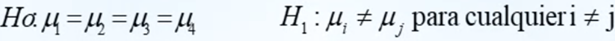


The same results were obtained in Excel. Since both Countries and years p-values are less than .05, we reject null hyphotesis. That is, countries and years have differences. In the awake of these conclutions, we can state that at a confidence leven of 95%, Countries are not homogenous but most important, we conclude that covid-19 lockdown encreases our perception of "Negative affect" given that means are not statisticalle equal.

In [600]:
formula="Q('Negative affect') ~ Q('Country name') + C(year)"
linear_2f_model = ols(formula, data=dfsin).fit()
aov_table = sm.stats.anova_lm(linear_2f_model, typ=2)
aov_table

C:\Users\actda\anaconda3\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 92, but rank is 91
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Q('Country name'),0.992841,92.0,6.825179,6.062332e-18
C(year),0.020602,1.0,13.029750,5.011432e-04
Residual,0.143886,91.0,NaN,NaN


For a deeper analysis, go check ANOVA_two_factors excel file.

## One-way ANOVA / ANOVA one factor: What about Ladder score and Freedom to make life choices?

#### Join databases

I will work with 2020 data. 2021 dataset includes _Regional indicator_ which will serve as a nominal variable (useful to make groups). That is why I need to joined both datasets by means of a left join.  

In [553]:
oneway2021 = df2021.copy()
oneway = df.copy()

In [554]:
oneway = oneway[oneway["year"] == 2020][["Country name","Life Ladder","Freedom to make life choices"]]
oneway2021 = oneway2021[["Country name","Regional indicator"]]

In [560]:
display(oneway)
display(oneway2021)

,Country name,Life Ladder,Freedom to make life choices
24,Albania,5.365,0.754
51,Argentina,5.901,0.823
79,Australia,7.137,0.905
92,Austria,7.213,0.912
117,Bahrain,6.173,0.945
...,...,...,...
1850,United States,7.028,0.850
1865,Uruguay,6.310,0.908
1893,Venezuela,4.574,0.612
1933,Zambia,4.838,0.750


,Country name,Regional indicator
0,Finland,Western Europe
1,Denmark,Western Europe
2,Switzerland,Western Europe
3,Iceland,Western Europe
4,Netherlands,Western Europe
...,...,...
144,Lesotho,Sub-Saharan Africa
145,Botswana,Sub-Saharan Africa
146,Rwanda,Sub-Saharan Africa
147,Zimbabwe,Sub-Saharan Africa


In [563]:
joined_one_way = pd.merge(oneway,oneway2021, how = "left", on = "Country name"); joined_one_way

,Country name,Life Ladder,Freedom to make life choices,Regional indicator
0,Albania,5.365,0.754,Central and Eastern Europe
1,Argentina,5.901,0.823,Latin America and Caribbean
2,Australia,7.137,0.905,North America and ANZ
3,Austria,7.213,0.912,Western Europe
4,Bahrain,6.173,0.945,Middle East and North Africa
...,...,...,...,...
90,United States,7.028,0.850,North America and ANZ
91,Uruguay,6.310,0.908,Latin America and Caribbean
92,Venezuela,4.574,0.612,Latin America and Caribbean
93,Zambia,4.838,0.750,Sub-Saharan Africa


In [565]:
# with pd.ExcelWriter("ANOVA_one_way.xlsx") as writer:
#     joined_one_way.to_excel(writer, sheet_name = "Countries", index = False)

#### Number of countries for each cluster
Unfortunately I have unbalance data that implies I cannot carry out a __ANOVA-twofactors with replications__. ANOVA one way tolerates this unbalance.


In [564]:
joined_one_way["Regional indicator"].value_counts()

Western Europe                        19
Central and Eastern Europe            16
Sub-Saharan Africa                    14
Latin America and Caribbean           11
Middle East and North Africa          11
Commonwealth of Independent States     7
East Asia                              6
Southeast Asia                         5
North America and ANZ                  4
South Asia                             2
Name: Regional indicator, dtype: int64

### ANOVA one way (Ladder Life)
At a confidence leve of 95% we reject null hyphotesis; in other words, Life Ladder depends on where you live. 

Text(0.5, 0, '')

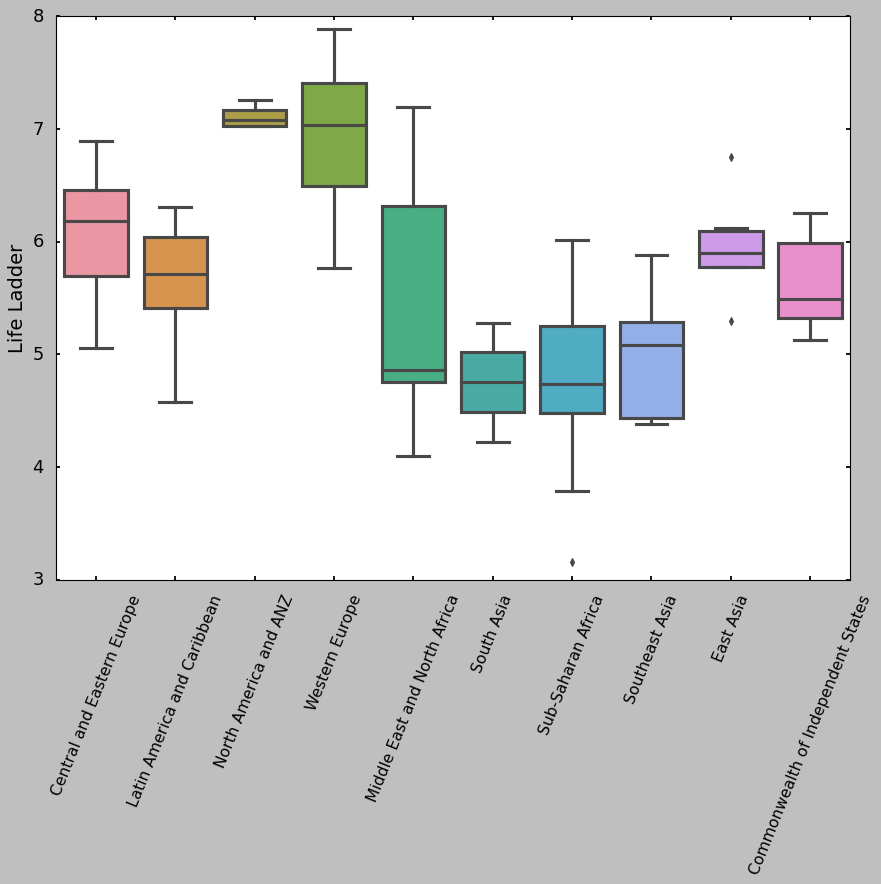

In [594]:
sns.boxplot(x = joined_one_way["Regional indicator"], y = joined_one_way["Life Ladder"])
plt.xticks(fontsize=14, rotation = 68)
plt.xlabel("")

#### ANOVA significance

In [578]:
formula_anova = "Q('Life Ladder') ~ Q('Regional indicator')"
linear_1f_model = ols(formula_anova, data=joined_one_way).fit()
anova_table = sm.stats.anova_lm(linear_1f_model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Q('Regional indicator'),9.0,54.794639,6.088293,14.690708,4.594206e-14
Residual,85.0,35.226684,0.414432,NaN,NaN


#### Ad hoc

In [580]:
paired_test = linear_1f_model.t_test_pairwise("Q('Regional indicator')")
paired_test.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Commonwealth of Independent States-Central and Eastern Europe,-0.435116,0.291730,-1.491502,1.395319e-01,-1.015154,0.144922,8.582405e-01,False
East Asia-Central and Eastern Europe,-0.120188,0.308178,-0.389993,6.975170e-01,-0.732929,0.492554,9.882007e-01,False
Latin America and Caribbean-Central and Eastern Europe,-0.416506,0.252146,-1.651844,1.022562e-01,-0.917839,0.084828,7.880141e-01,False
Middle East and North Africa-Central and Eastern Europe,-0.713233,0.252146,-2.828651,5.829553e-03,-1.214567,-0.211899,1.359851e-01,False
North America and ANZ-Central and Eastern Europe,1.035062,0.359875,2.876174,5.087012e-03,0.319535,1.750590,1.241845e-01,False
South Asia-Central and Eastern Europe,-1.324188,0.482823,-2.742596,7.432041e-03,-2.284168,-0.364207,1.576632e-01,False
Southeast Asia-Central and Eastern Europe,-1.065287,0.329831,-3.229801,1.761963e-03,-1.721079,-0.409496,4.985627e-02,True
Sub-Saharan Africa-Central and Eastern Europe,-1.315116,0.235593,-5.582144,2.781769e-07,-1.783539,-0.846693,1.140519e-05,True
Western Europe-Central and Eastern Europe,0.842734,0.218436,3.858039,2.218317e-04,0.408425,1.277042,7.416980e-03,True
East Asia-Commonwealth of Independent States,0.314929,0.358157,0.879303,3.817160e-01,-0.397184,1.027041,9.836836e-01,False


#### Levene
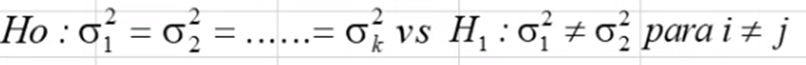

In [630]:
g1 = joined_one_way[joined_one_way["Regional indicator"] == "Central and Eastern Europe"]["Life Ladder"]
g2 = joined_one_way[joined_one_way["Regional indicator"] == "Latin America and Caribbean"]["Life Ladder"]
g3 = joined_one_way[joined_one_way["Regional indicator"] == "North America and ANZ"]["Life Ladder"]
g4 = joined_one_way[joined_one_way["Regional indicator"] == "Western Europe"]["Life Ladder"]
g5 = joined_one_way[joined_one_way["Regional indicator"] == "Middle East and North Africa"]["Life Ladder"]
g6 = joined_one_way[joined_one_way["Regional indicator"] == "South Asia"]["Life Ladder"]
g7 = joined_one_way[joined_one_way["Regional indicator"] == "Sub-Saharan Africa"]["Life Ladder"]
g8 = joined_one_way[joined_one_way["Regional indicator"] == "Southeast Asia"]["Life Ladder"]
g9 = joined_one_way[joined_one_way["Regional indicator"] == "East Asia"]["Life Ladder"]
g10 = joined_one_way[joined_one_way["Regional indicator"] == "Commonwealth of Independent States"]["Life Ladder"]

In [631]:
levene(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10)

LeveneResult(statistic=1.2040842873396387, pvalue=0.3033167723851676)

We fail to reject null hyphotesis and we have equal of variances statistically wise.

### ANOVA one way (Freedom to make life choices)
At a confidence leve of 95% we reject null hyphotesis; in other words, Freedom to make life choices depends on where you live. 

Text(0.5, 0, '')

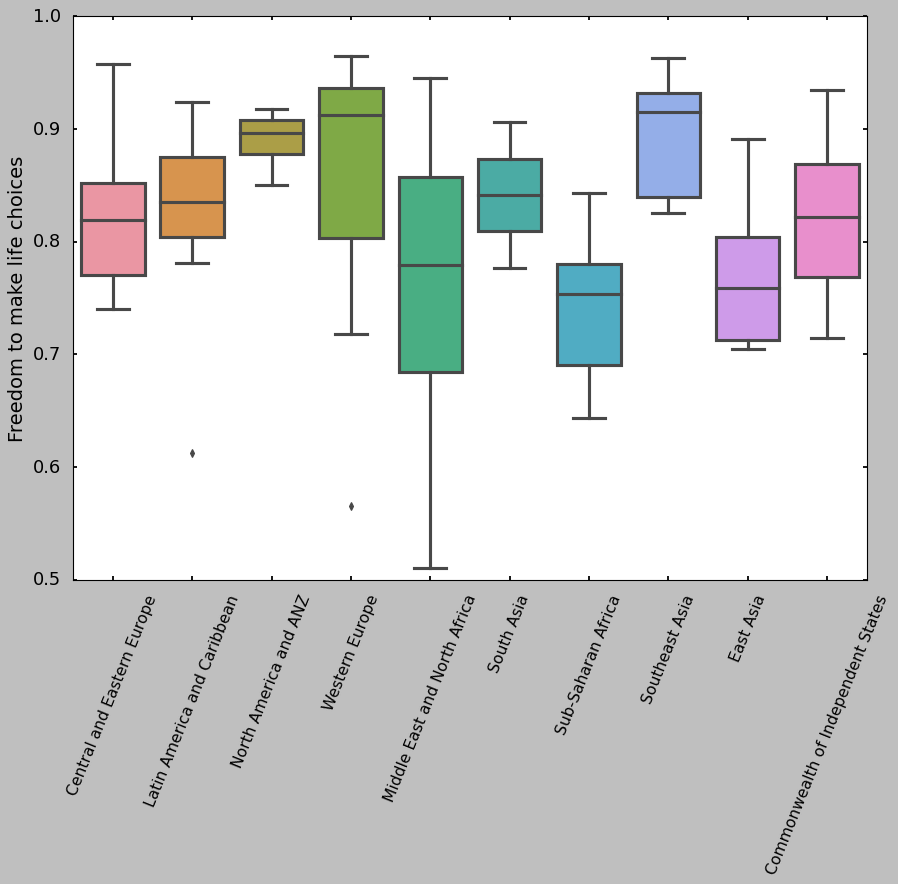

In [595]:
sns.boxplot(x = joined_one_way["Regional indicator"], y = joined_one_way["Freedom to make life choices"])
plt.xticks(fontsize=14, rotation = 68)
plt.xlabel("")

#### ANOVA significance

In [598]:
formula_anova = "Q('Freedom to make life choices') ~ Q('Regional indicator')"
linear_1f_model = ols(formula_anova, data=joined_one_way).fit()
anova_table = sm.stats.anova_lm(linear_1f_model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Q('Regional indicator'),9.0,0.211911,0.023546,2.967209,0.004112
Residual,84.0,0.666564,0.007935,NaN,NaN


#### Ad hoc

In [597]:
paired_test = linear_1f_model.t_test_pairwise("Q('Regional indicator')")
paired_test.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Commonwealth of Independent States-Central and Eastern Europe,-0.005104,0.042644,-0.119693,0.905012,-0.089906,0.079698,0.999995,False
East Asia-Central and Eastern Europe,-0.054771,0.042644,-1.284376,0.202541,-0.139573,0.030031,0.997781,False
Latin America and Caribbean-Central and Eastern Europe,-0.000256,0.034890,-0.007328,0.994170,-0.069639,0.069128,0.999995,False
Middle East and North Africa-Central and Eastern Europe,-0.058437,0.034890,-1.674884,0.097676,-0.127821,0.010946,0.966352,False
North America and ANZ-Central and Eastern Europe,0.063562,0.049797,1.276423,0.205324,-0.035465,0.162590,0.997781,False
South Asia-Central and Eastern Europe,0.015063,0.066810,0.225452,0.822175,-0.117797,0.147922,0.999995,False
Southeast Asia-Central and Eastern Europe,0.068562,0.045640,1.502245,0.136784,-0.022198,0.159323,0.989536,False
Sub-Saharan Africa-Central and Eastern Europe,-0.082723,0.032600,-2.537520,0.013011,-0.147552,-0.017894,0.407778,False
Western Europe-Central and Eastern Europe,0.037931,0.030226,1.254917,0.212989,-0.022176,0.098038,0.997781,False
East Asia-Commonwealth of Independent States,-0.049667,0.051430,-0.965705,0.336964,-0.151942,0.052609,0.999075,False


#### Levene

In [645]:
g1 = joined_one_way[joined_one_way["Regional indicator"] == "Central and Eastern Europe"]["Freedom to make life choices"]
g2 = joined_one_way[joined_one_way["Regional indicator"] == "Latin America and Caribbean"]["Freedom to make life choices"]
g3 = joined_one_way[joined_one_way["Regional indicator"] == "North America and ANZ"]["Freedom to make life choices"]
g4 = joined_one_way[joined_one_way["Regional indicator"] == "Western Europe"]["Freedom to make life choices"]
g5 = joined_one_way[joined_one_way["Regional indicator"] == "Middle East and North Africa"]["Freedom to make life choices"]
g6 = joined_one_way[joined_one_way["Regional indicator"] == "South Asia"]["Freedom to make life choices"]
g7 = joined_one_way[joined_one_way["Regional indicator"] == "Sub-Saharan Africa"]["Freedom to make life choices"]
g8 = joined_one_way[joined_one_way["Regional indicator"] == "Southeast Asia"]["Freedom to make life choices"]
g9 = joined_one_way[joined_one_way["Regional indicator"] == "East Asia"]["Freedom to make life choices"]
g10 = joined_one_way[joined_one_way["Regional indicator"] == "Commonwealth of Independent States"]["Freedom to make life choices"].dropna()

In [646]:
levene(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10)

LeveneResult(statistic=1.1157548948561329, pvalue=0.36087589376133694)

We fail to reject null hyphotesis and we have equal of variances statistically wise.